In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Load data
data = np.loadtxt("data.txt", delimiter=',')
X = data[:, :2]
y = data[:, 2]
X_train = X
y_train = y

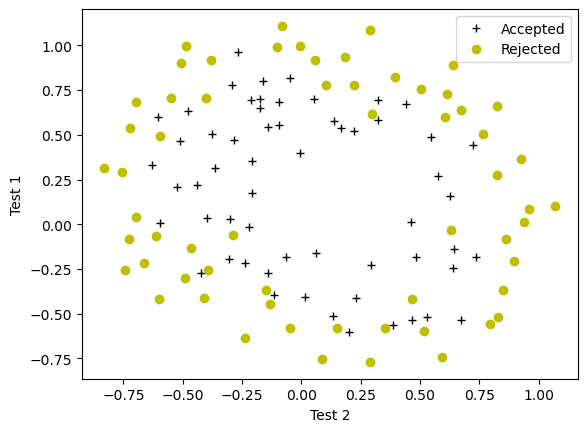

In [3]:
# Plot data to visualize
def plot_data(X, y, positive_label="y=1", negative_label="y=0"):
    positive = y == 1
    negative = y == 0
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=positive_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=negative_label)

plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")

plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()

In [4]:
# Feature mapping
def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append(X1**(i - j) * X2**j)
    return np.stack(out, axis=1)

In [5]:
print("Original shape of data:", X_train.shape)
mapped_X = map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)


Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [6]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid_test(sigmoid)

Tests passed!


In [7]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

# Compute cost
def compute_cost(X, y, w, b, lambda_=0):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    cost = -(1/m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    total_cost = cost + reg_cost
    return total_cost

compute_cost_test(compute_cost)

# Test compute_cost function
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)
print('Cost at test w,b: {:.3f}'.format(cost))


Tests passed!
Cost at test w,b: 11.777


In [8]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

# Compute regularized cost
def compute_cost_reg(X, y, w, b, lambda_=1):
    return compute_cost(X, y, w, b, lambda_)

compute_cost_reg_test(compute_cost_reg)

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)


All tests passed!
Regularised cost : 0.6618252552483949


In [9]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')
    print(f"dj_db: {dj_db}, dj_dw: {dj_dw.tolist()}")

# Compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
    m, n = X.shape
    z = np.dot(X, w) + b
    h = sigmoid(z)
    error = h - y
    dj_dw = (1/m) * np.dot(X.T, error)
    dj_db = (1/m) * np.sum(error)
    return dj_db, dj_dw

compute_gradient_test(compute_gradient)


Tests passed!
dj_db: 0.2893609413522082, dj_dw: [-0.11999166171958331, 0.4149877494464399, -0.7196840467264483]


In [10]:
# Compute regularized gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
    dj_db, dj_dw = compute_gradient(X, y, w, b, lambda_)

    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    error = h - y
    dj_dw = (1/m) * np.dot(X.T, error)
    dj_db = (1/m) * np.sum(error)

    # Regularization
    if lambda_ is not None:
        dj_dw += (lambda_ / m) * w
        dj_db += (lambda_ / m) * np.sum(w)

    return dj_db, dj_dw

# Test compute_gradient_reg function
def compute_gradient_reg_test(target):
    np.random.seed(2)
    X = np.random.randn(5, 3)
    y = np.array([1, 0, 1, 1, 0])
    test_w = np.array([0.1, 0.2, 0.3])
    test_b = -0.5
    lambda_ = 0.2
    expected_db = 0.196056
    expected_dw = np.array([0.063793, 0.057232, 0.230002])

    dj_db, dj_dw = target(X, y, test_w, test_b, lambda_)

    assert np.isclose(dj_db, expected_db), f"Wrong value for dj_db. Expected: {expected_db} got: {dj_db}"
    assert dj_dw.shape == expected_dw.shape, f"Wrong shape for dj_dw. Expected: {expected_dw.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, expected_dw), f"Wrong value for dj_dw. Expected: {expected_dw} got: {dj_dw}"

    print('\033[92mTests passed!')

compute_gradient_reg_test(compute_gradient_reg)


AssertionError: Wrong value for dj_db. Expected: 0.196056 got: -0.23730675724053144

In [11]:
# Optimization function (Gradient Descent)
def gradient_descent(X, y, w, b, learning_rate, iterations, lambda_=None):
    costs = []
    for i in range(iterations):
        cost = compute_cost(X, y, w, b, lambda_)
        dj_db, dj_dw = compute_gradient(X, y, w, b, lambda_)

        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        if i % 100 == 0:
            costs.append(cost)

    return w, b, costs

In [12]:
# Test gradient descent function
np.random.seed(3)
test_w = np.random.rand(X_mapped.shape[1])
test_b = 0.5
learning_rate = 0.3
iterations = 5000
lambda_ = 0.8

optimal_w, optimal_b, costs = gradient_descent(X_mapped, y_train, test_w, test_b, learning_rate, iterations, lambda_)

print(f"Optimal w: {optimal_w}")
print(f"Optimal b: {optimal_b}")


Optimal w: [ 2.39183032  3.94045671 -5.3362526  -4.81217669 -5.68823304  1.39942229
 -1.93938191 -0.82248881 -0.78302261 -4.40886268  0.45047935 -2.32355253
 -1.55520295 -3.7868141  -0.6741408  -0.33945455  0.70035165 -1.24940264
 -1.79959274  0.34113839 -3.80414553  1.13504343 -0.766241    0.5537045
 -1.17974364 -0.98166368 -1.29263196]
Optimal b: 3.5211863444248865


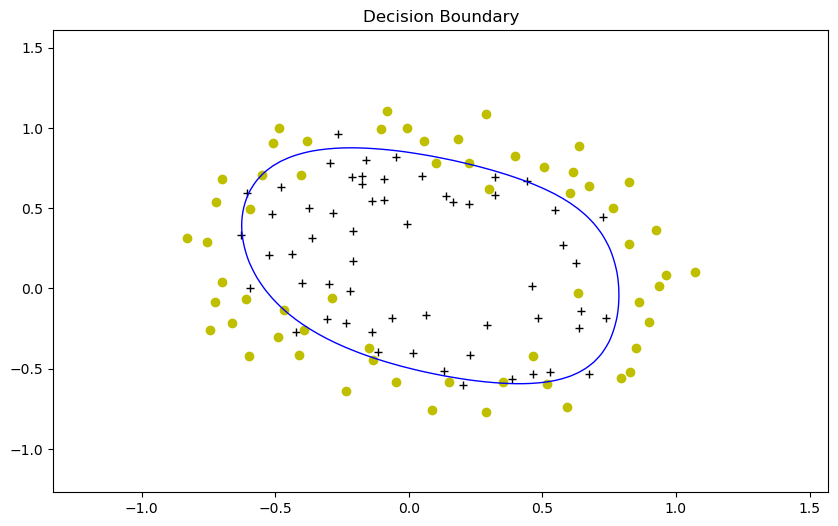

In [13]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

# Plot decision boundary
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 6))
    plot_data(X, y)
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                           np.linspace(x2_min, x2_max, 100))
    mapped_xx = map_feature(xx1.ravel(), xx2.ravel())
    h = predict(mapped_xx, w, b)
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_train, y_train, optimal_w, optimal_b)

In [14]:

# Accuracy function
def accuracy(X, y, w, b, threshold=0.5):
    p = predict(X, w, b) > threshold
    return np.mean(p == y) * 100

acc_train = accuracy(X_mapped, y_train, optimal_w, optimal_b)
print(f"Training Accuracy: {acc_train}%")


Training Accuracy: 83.89830508474576%
